In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import keras
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
input_shape = (28, 28, 1)

Y_train = train["label"].values
X_train = train.drop(labels = ["label"],axis = 1)
X_train = X_train / 255.0
X_test = test / 255.0
X_train = X_train.values.reshape(X_train.shape[0],28,28,1)
X_test = X_test.values.reshape(X_test.shape[0],28,28,1)

In [4]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (42000, 28, 28, 1)
X_test shape: (28000, 28, 28, 1)


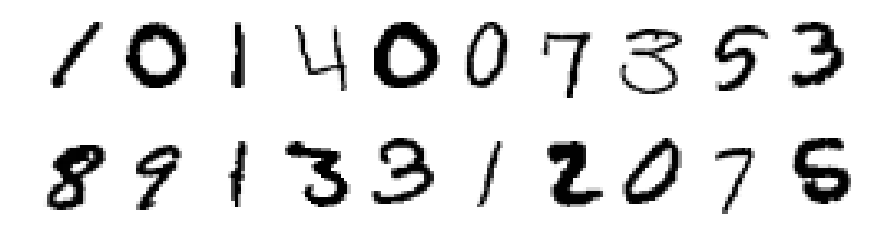

In [5]:
plt.figure(figsize=(15,4.5))
for i in range(20):  
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

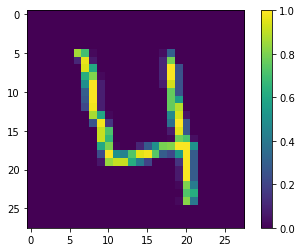

In [6]:
plt.figure()
plt.imshow(X_train[3].reshape((28,28)))
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(192, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(192, (5,5), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2, padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 192)       221376    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 192)         0

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']);

In [9]:
train_images, test_images, train_labels, test_labels = train_test_split(X_train, \
                                                                     Y_train, test_size=0.1, random_state=42)

In [10]:
datagen = ImageDataGenerator(rotation_range=10,  
                                    zoom_range = 0.10,  
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1)

In [11]:
training = model.fit_generator(datagen.flow(train_images, train_labels, batch_size=64), epochs=10, \
                              validation_data=(test_images, test_labels));

Train for 591 steps, validate on 4200 samples
Epoch 1/10
591/591 [==============================] - 19s 32ms/step - loss: 0.2166 - accuracy: 0.9301 - val_loss: 0.0593 - val_accuracy: 0.9814
Epoch 2/10
591/591 [==============================] - 14s 23ms/step - loss: 0.0582 - accuracy: 0.9827 - val_loss: 0.0375 - val_accuracy: 0.9886
Epoch 3/10
591/591 [==============================] - 14s 24ms/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0323 - val_accuracy: 0.9898
Epoch 4/10
591/591 [==============================] - 14s 24ms/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0370 - val_accuracy: 0.9895
Epoch 5/10
591/591 [==============================] - 15s 25ms/step - loss: 0.0349 - accuracy: 0.9894 - val_loss: 0.0245 - val_accuracy: 0.9921
Epoch 6/10
591/591 [==============================] - 14s 24ms/step - loss: 0.0317 - accuracy: 0.9903 - val_loss: 0.0379 - val_accuracy: 0.9886
Epoch 7/10
591/591 [==============================] - 14s 23ms/step - loss: 0.0262 - accur

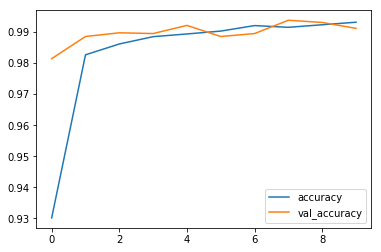

In [12]:
history = training.history

sns.lineplot(x=range(len(history["accuracy"])),y=history["accuracy"], label="accuracy")
sns.lineplot(x=range(len(history["val_accuracy"])),y=history["val_accuracy"], label="val_accuracy")

In [13]:
def get_class(pred):
    return np.argmax(pred)

In [14]:
predictions = model.predict(X_test)

In [15]:
predict_class = [get_class(predictions[x]) for x in range(len(predictions))]

In [16]:
sample_submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv',index_col=[0])
sample_submission['Label'] = predict_class

In [17]:
sample_submission

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3
...,...
27996,9
27997,7
27998,3
